In [42]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [48]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)


measurement


## D1: Determine the Summary Statistics for June

In [7]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
month_june_temp = []
month_june_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date) == 6).all()
for j in month_june_temp:
   print(j)

('2010-06-01', 78.0)
('2010-06-02', 76.0)
('2010-06-03', 78.0)
('2010-06-04', 76.0)
('2010-06-05', 77.0)
('2010-06-06', 78.0)
('2010-06-07', 77.0)
('2010-06-08', 78.0)
('2010-06-09', 78.0)
('2010-06-10', 79.0)
('2010-06-11', 78.0)
('2010-06-12', 78.0)
('2010-06-13', 78.0)
('2010-06-14', 77.0)
('2010-06-15', 78.0)
('2010-06-16', 78.0)
('2010-06-17', 77.0)
('2010-06-18', 77.0)
('2010-06-19', 82.0)
('2010-06-20', 78.0)
('2010-06-21', 78.0)
('2010-06-22', 78.0)
('2010-06-23', 78.0)
('2010-06-24', 78.0)
('2010-06-25', 77.0)
('2010-06-26', 76.0)
('2010-06-27', 78.0)
('2010-06-28', 78.0)
('2010-06-29', 78.0)
('2010-06-30', 78.0)
('2011-06-01', 77.0)
('2011-06-02', 78.0)
('2011-06-03', 73.0)
('2011-06-04', 70.0)
('2011-06-05', 76.0)
('2011-06-06', 77.0)
('2011-06-07', 77.0)
('2011-06-08', 77.0)
('2011-06-09', 77.0)
('2011-06-10', 78.0)
('2011-06-11', 77.0)
('2011-06-12', 77.0)
('2011-06-13', 78.0)
('2011-06-14', 78.0)
('2011-06-15', 77.0)
('2011-06-17', 78.0)
('2011-06-18', 78.0)
('2011-06-19'

In [8]:
# 2. Convert the June temperatures to a list.
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(june_temps)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [9]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temps, columns=['Date','June Temps'])
june_temp_df

,Date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [10]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

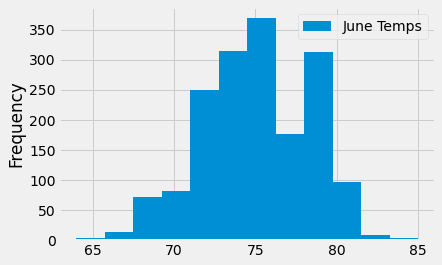

In [36]:
june_temp_df.plot.hist(bins=12)
plt.tight_layout

In [11]:
# 5. Return to your challenge instructions to compare your summary statistics


## D2: Determine the Summary Statistics for December

In [12]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

december_temps = []
december_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()
for j in december_temps:
   print(j)

('2010-12-01', 76.0)
('2010-12-03', 74.0)
('2010-12-04', 74.0)
('2010-12-06', 64.0)
('2010-12-07', 64.0)
('2010-12-08', 67.0)
('2010-12-09', 77.0)
('2010-12-10', 66.0)
('2010-12-11', 69.0)
('2010-12-12', 68.0)
('2010-12-13', 68.0)
('2010-12-14', 71.0)
('2010-12-15', 74.0)
('2010-12-16', 67.0)
('2010-12-17', 66.0)
('2010-12-18', 69.0)
('2010-12-19', 71.0)
('2010-12-23', 70.0)
('2010-12-24', 70.0)
('2010-12-26', 74.0)
('2010-12-27', 74.0)
('2010-12-28', 71.0)
('2010-12-29', 75.0)
('2010-12-30', 75.0)
('2010-12-31', 72.0)
('2011-12-01', 69.0)
('2011-12-02', 68.0)
('2011-12-03', 73.0)
('2011-12-04', 74.0)
('2011-12-05', 73.0)
('2011-12-06', 73.0)
('2011-12-07', 73.0)
('2011-12-08', 73.0)
('2011-12-09', 71.0)
('2011-12-10', 73.0)
('2011-12-11', 73.0)
('2011-12-12', 77.0)
('2011-12-13', 72.0)
('2011-12-14', 71.0)
('2011-12-15', 73.0)
('2011-12-16', 70.0)
('2011-12-17', 73.0)
('2011-12-18', 69.0)
('2011-12-19', 74.0)
('2011-12-20', 72.0)
('2011-12-21', 71.0)
('2011-12-22', 72.0)
('2011-12-23'

('2016-12-30', 68.0)
('2010-12-02', 71.0)
('2010-12-03', 70.0)
('2010-12-05', 73.0)
('2010-12-06', 78.0)
('2010-12-07', 76.0)
('2010-12-08', 73.0)
('2010-12-09', 74.0)
('2010-12-10', 63.0)
('2010-12-11', 72.0)
('2010-12-13', 75.0)
('2010-12-14', 74.0)
('2010-12-15', 72.0)
('2010-12-16', 68.0)
('2012-12-03', 74.0)
('2012-12-06', 73.0)
('2013-12-17', 73.0)
('2013-12-19', 72.0)
('2013-12-20', 73.0)
('2013-12-23', 72.0)
('2010-12-01', 78.0)
('2010-12-02', 74.0)
('2010-12-03', 74.0)
('2010-12-04', 78.0)
('2010-12-05', 78.0)
('2010-12-06', 61.0)
('2010-12-07', 69.0)
('2010-12-08', 65.0)
('2010-12-09', 77.0)
('2010-12-10', 67.0)
('2010-12-11', 69.0)
('2010-12-12', 75.0)
('2010-12-13', 67.0)
('2010-12-14', 71.0)
('2010-12-15', 74.0)
('2010-12-16', 66.0)
('2010-12-17', 66.0)
('2010-12-18', 77.0)
('2010-12-19', 70.0)
('2010-12-20', 73.0)
('2010-12-21', 71.0)
('2010-12-22', 71.0)
('2010-12-23', 71.0)
('2010-12-24', 67.0)
('2010-12-25', 71.0)
('2010-12-26', 74.0)
('2010-12-27', 76.0)
('2010-12-28'

In [13]:
# 7. Convert the December temperatures to a list.
december_temps_lst = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)== 12).all()
print(december_temps_lst)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [14]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temp_df = pd.DataFrame(december_temps_lst, columns = ['Date', 'December Temps'])
december_temp_df

,Date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [15]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

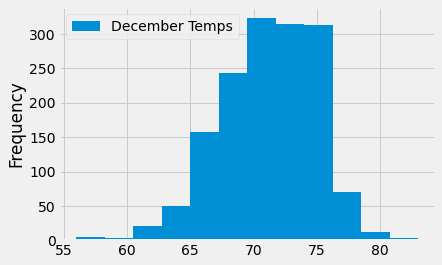

In [33]:
december_temp_df.plot.hist(bins=12)
plt.tight_layout

In [16]:
# Combine June and December DataFrames
frames = [june_temp_df, december_temp_df]
june_dec_temps_df = pd.concat(frames)
june_dec_temps_df.describe()

,June Temps,December Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


In [17]:
#Check values of new DataFrame
june_dec_results = june_dec_temps_df.values
print(june_dec_results)

[['2010-06-01' 78.0 nan]
 ['2010-06-02' 76.0 nan]
 ['2010-06-03' 78.0 nan]
 ...
 ['2016-12-29' nan 69.0]
 ['2016-12-30' nan 65.0]
 ['2016-12-31' nan 65.0]]


In [67]:
year_2017 = dt.date(2017, 12, 31) - dt.timedelta(days=365)
Dec_prcp_2017 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_2017).\
    filter(extract('month', Measurement.date)==12)

In [68]:
Dec_prcp_2017_df = pd.DataFrame(Dec_prcp_2017, columns = ["Date", "Dec PRCP"])
Dec_prcp_2017_df.head()

,Date,Dec PRCP
0,2016-12-31,0.01
1,2016-12-31,0.62
2,2016-12-31,0.36
3,2016-12-31,0.25
4,2016-12-31,0.90


In [75]:
Dec_prcp_2017_df.describe()

,Dec PRCP
count,5.000000
mean,0.428000
std,0.343031
min,0.010000
25%,0.250000
50%,0.360000
75%,0.620000
max,0.900000


In [69]:

June_prcp_2017 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_2017 ).\
    filter(extract('month', Measurement.date)==6)

In [71]:
June_prcp_2017_df = pd.DataFrame(June_prcp_2017, columns = ["Date", "June PRCP"])
June_prcp_2017_df.head()

,Date,June PRCP
0,2017-06-01,0.00
1,2017-06-02,0.00
2,2017-06-03,0.02
3,2017-06-04,0.00
4,2017-06-05,0.00


In [74]:
June_prcp_2017_df.describe()

,June PRCP
count,171.000000
mean,0.120000
std,0.217726
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,1.690000


In [76]:
prcpframes = [June_prcp_2017_df, Dec_prcp_2017_df]
june_dec_prcp_df = pd.concat(prcpframes)
june_dec_prcp_df.describe()

,June PRCP,Dec PRCP
count,171.000000,5.000000
mean,0.120000,0.428000
std,0.217726,0.343031
min,0.000000,0.010000
25%,0.000000,0.250000
50%,0.020000,0.360000
75%,0.150000,0.620000
max,1.690000,0.900000


<AxesSubplot:>

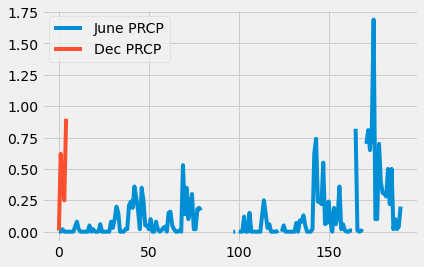

In [77]:
june_dec_prcp_df.plot()